<a href="https://colab.research.google.com/github/stojchevska/AirplaneCrashesAnalysis/blob/main/AirplaneCrashesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализа на авионски несреќи од 1908 до денес


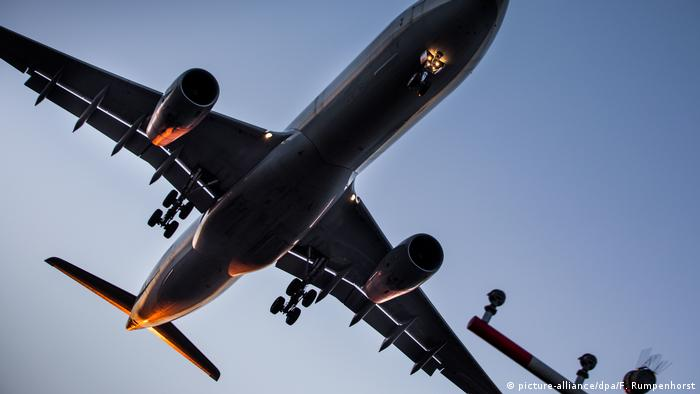

Целта на оваа задача е да се направи анализа на податочно множество кое содржи информации за авионски несреќи од 1908 година до денес. Со помош на анализа и визуелизации да се воочи во која година или пак преку која авио-компанија имало најмногу несреќи, и слично.

Предмет: Веб базирани системи 




Студент: Ивана Стојчевска 181038

Податочното множество е преземено од: https://www.kaggle.com/datasets/saurograndi/airplane-crashes-since-1908

In [242]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [243]:
#вчитување на библиотеки
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

In [244]:
#читање податочното множество
data=pd.read_csv('/content/drive/MyDrive/Airplane_Crashes_and_Fatalities_Since_1908.csv',sep=',')
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [245]:
#проверка колку вредности од секоја променлива недостасуваат
data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

Она што може да го воочиме е дека за променливите кои нам најмногу нè засегаат (Date, Operator, Aborad, Fatalities, Survivor) недостасуваат релативно мал број податоци.

Чистење на податоците

In [246]:
#чистење на податоците за време
data['Time'] = data['Time'].replace(np.nan, '00:00') 
data['Time'] = data['Time'].str.replace('c: ', '')
data['Time'] = data['Time'].str.replace('c:', '')
data['Time'] = data['Time'].str.replace('c', '')
data['Time'] = data['Time'].str.replace('12\'20', '12:20')
data['Time'] = data['Time'].str.replace('18.40', '18:40')
data['Time'] = data['Time'].str.replace('0943', '09:43')
data['Time'] = data['Time'].str.replace('22\'08', '22:08')
data['Time'] = data['Time'].str.replace('114:20', '00:00') 

#отстранување на дупликати поради големи/мали букви
data.Operator = data.Operator.str.upper()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [247]:
#спојување на датум и време во една колона
data['Time'] = data['Date'] + ' ' + data['Time'] 
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
data['Time'] = data['Time'].apply(todate) 

In [248]:
#бришење на колоните коишто не ни се потребни
del data["Flight #"]
del data["Route"]
del data["cn/In"]
del data["Ground"]
del data["Registration"]

In [249]:
#бришење на вредностите коишто недосатасуваат
data.dropna(subset=["Time","Location","Operator","Type","Aboard","Fatalities"], inplace=True)

In [250]:
data.isnull().sum()

Date            0
Time            0
Location        0
Operator        0
Type            0
Aboard          0
Fatalities      0
Summary       368
dtype: int64

# Визуелизации

Број на авионски несреќи по година, месец, ден од неделата и час
---



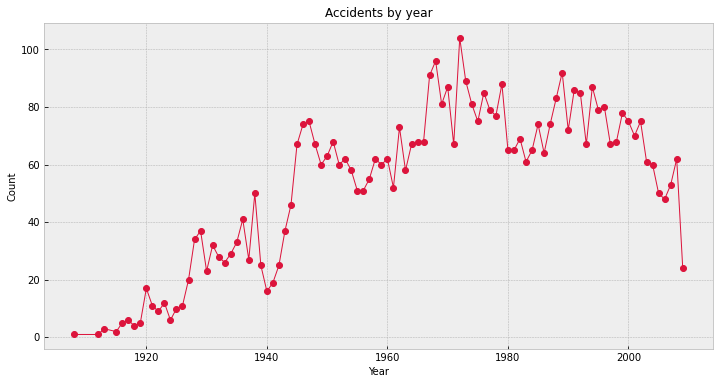

In [251]:
temp = data.groupby(data.Time.dt.year)[['Date']].count()
temp = temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(temp.index, 'Count', data=temp, color='crimson', marker = "o", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Accidents by year', loc='Center', fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


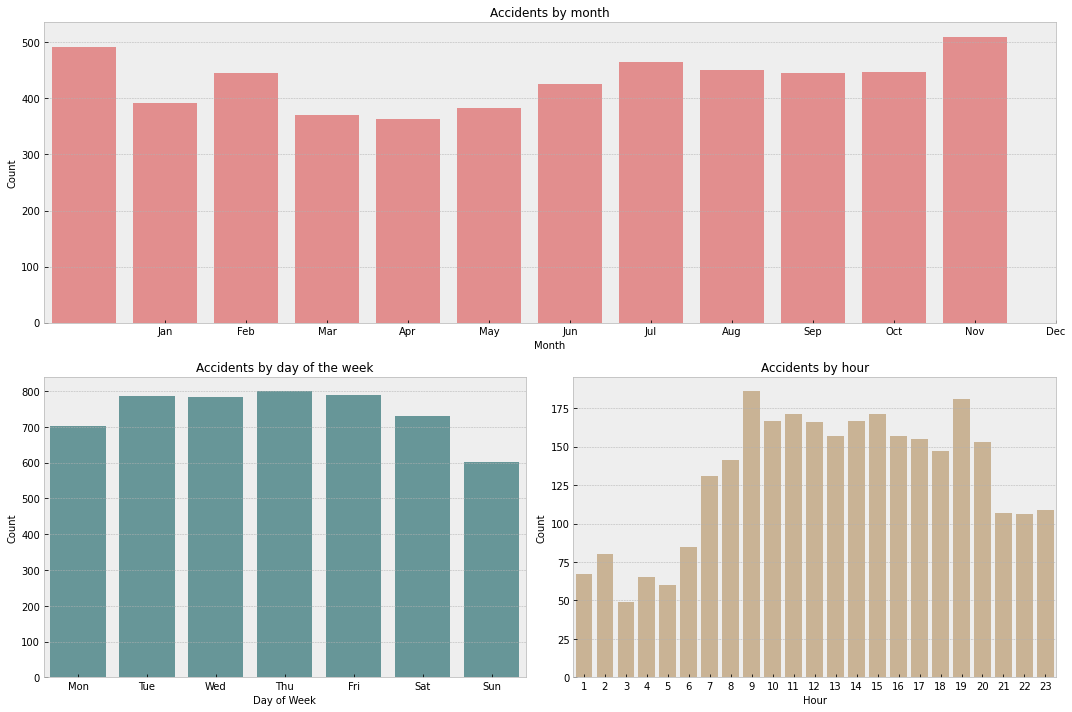

In [252]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(15,10))
plt.style.use('bmh')

ax = pl.subplot(gs[0, :]) 
sns.barplot(data.groupby(data.Time.dt.month)[['Date']].count().index, 'Date', data=data.groupby(data.Time.dt.month)[['Date']].count(), color='lightcoral', linewidth=2)
plt.xticks(data.groupby(data.Time.dt.month)[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Accidents by month', loc='Center', fontsize=12)

ax = pl.subplot(gs[1, 0])
sns.barplot(data.groupby(data.Time.dt.weekday)[['Date']].count().index, 'Date', data=data.groupby(data.Time.dt.weekday)[['Date']].count(), color='cadetblue', linewidth=2)
plt.xticks(data.groupby(data.Time.dt.weekday)[['Date']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Accidents by day of the week', loc='Center', fontsize=12)

ax = pl.subplot(gs[1, 1])
sns.barplot(data[data.Time.dt.hour != 0].groupby(data.Time.dt.hour)[['Date']].count().index, 'Date', data=data[data.Time.dt.hour != 0].groupby(data.Time.dt.hour)[['Date']].count(),color ='tan', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Accidents by hour', loc='Center', fontsize=12)
plt.tight_layout()
plt.show()

##Стапка на преживување - визуелизации и статистики
 ---



In [253]:
data["Survival Rate"] = 100 * (data["Aboard"] - data["Fatalities"]) / data["Aboard"]
data.head()

,Date,Time,Location,Operator,Type,Aboard,Fatalities,Summary,Survival Rate
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,Wright Flyer III,2.0,1.0,"During a demonstration flight, a U.S. Army fly...",50.0
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,Dirigible,5.0,5.0,First U.S. dirigible Akron exploded just offsh...,0.0
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,Curtiss seaplane,1.0,1.0,The first fatal airplane accident in Canada oc...,0.0
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,Zeppelin L-1 (airship),20.0,14.0,The airship flew into a thunderstorm and encou...,30.0
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,Zeppelin L-2 (airship),30.0,30.0,Hydrogen gas which was being vented was sucked...,0.0


In [254]:
data_mean = data["Survival Rate"].mean()
data_min = data["Survival Rate"].min()
data_max = data["Survival Rate"].max()
data_var = data["Survival Rate"].var()

print("Mean: {}".format(round(data_mean,2)))
print("Min: {}".format(round(data_min,2)))
print("Max: {}".format(round(data_max,2)))
print("Variance: {}".format(round(data_var,2)))

Mean: 16.57
Min: 0.0
Max: 100.0
Variance: 897.95


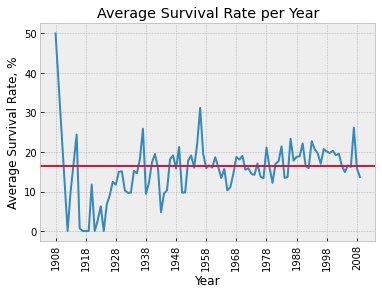

In [255]:
yearly_survival = data[["Date","Survival Rate"]].groupby(data.Time.dt.year).agg(["mean"])
yearly_survival.plot(legend=None)
plt.ylabel("Average Survival Rate, %")
plt.xlabel("Year")
plt.title("Average Survival Rate per Year")
plt.xticks([x for x in range(1908,2009,10)], rotation='vertical')
plt.axhline(y=data_mean, color='crimson', linestyle='-')
plt.show()

## Споредба на комерцијални и воени летови

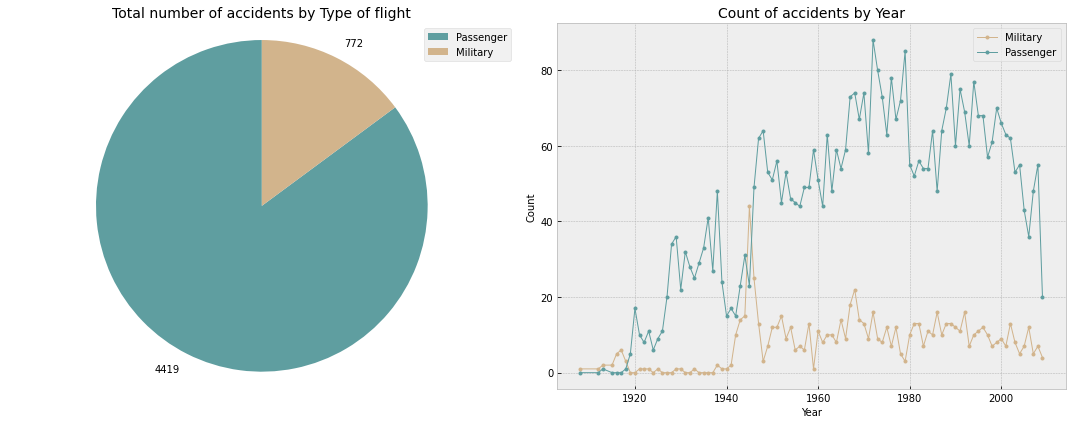

In [256]:
temp = data.copy()
temp['isMilitary'] = temp.Operator.str.contains('MILITARY')
temp = temp.groupby('isMilitary')[['isMilitary']].count()
temp.index = ['Passenger', 'Military']

temp2 = data.copy()
temp2['Military'] = temp2.Operator.str.contains('MILITARY')
temp2['Passenger'] = temp2.Military == False
temp2 = temp2.loc[:, ['Time', 'Military', 'Passenger']]
temp2 = temp2.groupby(temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

colors = ['cadetblue','tan']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(temp.isMilitary, colors=colors, labels=temp.isMilitary, startangle=90)
plt.legend(patches, temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(temp2.index, 'Military', data=temp2, color='tan', marker = ".", linewidth=1)
plt.plot(temp2.index, 'Passenger', data=temp2, color='cadetblue', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

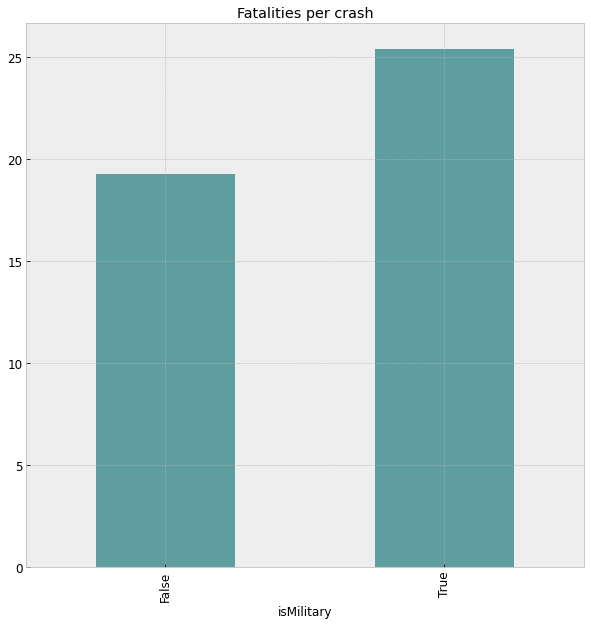

In [257]:
temp = data.copy()
temp['isMilitary'] = temp.Operator.str.contains('MILITARY')
temp.groupby(['isMilitary'])['Fatalities'].mean().plot(kind='bar', title = 'Fatalities per crash', figsize=(10,10), fontsize=12,color='cadetblue')

## Типови на авиони и несреќи

In [258]:
fatal = data.groupby('Type')[['Fatalities']].sum()
fatal = fatal.rename(columns={'Type': 'Fatalities'})
total_by_type = fatal.sort_values(by='Fatalities', ascending=False)
total_by_typeTOP10 = fatal.head(10) 
total_by_typeTOP10

,Fatalities
Type,
AAC-1 Toucan,23.0
AEGK,5.0
AT L98 Carvair,4.0
ATR 42-300,2.0
ATR-42-300,46.0
ATR-72-202,16.0
ATR-72-212,68.0
Aermacchi MB-339PAN (3 aircraft),3.0
Aero Commander 520,6.0


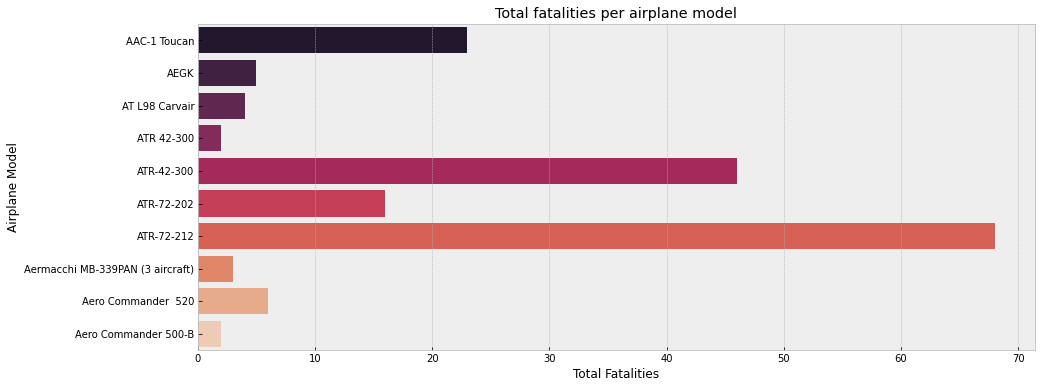

In [259]:
plt.figure(figsize=(15, 6))
sns.barplot(y=total_by_typeTOP10.index, x="Fatalities", data=total_by_typeTOP10, palette="rocket")
plt.xlabel('Total Fatalities')
plt.ylabel('Airplane Model')
plt.title('Total fatalities per airplane model')
plt.show()

## Анализа на оператори - Кој е најлош оператор?

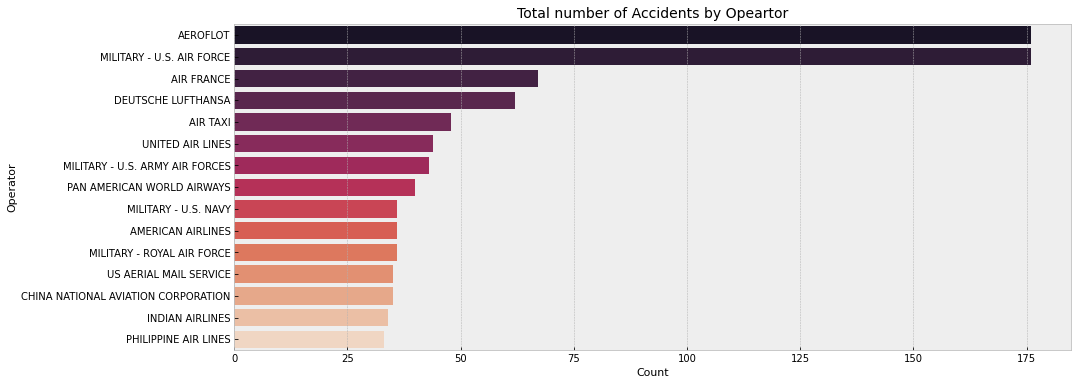

In [260]:
data.Operator = data.Operator.str.upper()

total_count = data.groupby('Operator')[['Operator']].count()
total_count = total_count.rename(columns={"Operator": "Count"})
total_count = total_count.sort_values(by='Count', ascending=False).head(15)

plt.figure(figsize=(15,6))
sns.barplot(y=total_count.index, x="Count", data=total_count, palette="rocket", orient='h')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total number of Accidents by Opeartor', loc='Center', fontsize=14)
plt.show()

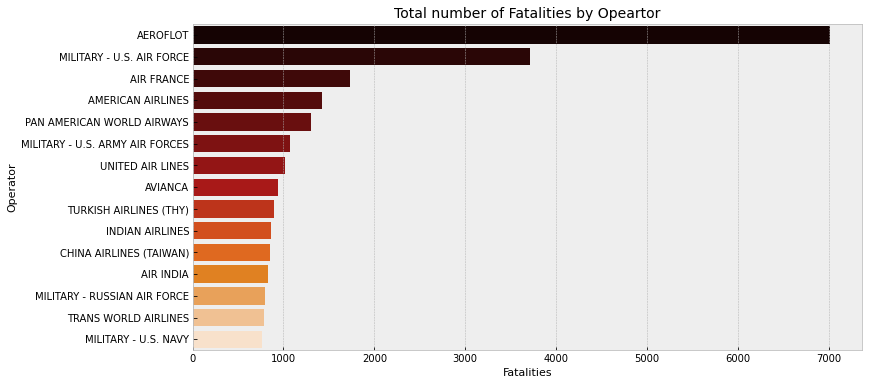

In [261]:
total_fatal = data.groupby('Operator')[['Fatalities']].sum()
total_fatal = total_fatal.rename(columns={"Operator": "Fatalities"})
total_fatal = total_fatal.sort_values(by='Fatalities', ascending=False)
total_fatalTOP = total_fatal.head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=total_fatalTOP.index, x="Fatalities", data=total_fatalTOP, palette="gist_heat", orient='h')
plt.xlabel('Fatalities', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total number of Fatalities by Opeartor', loc='Center', fontsize=14)
plt.show()

Според ова може да заклучиме дека најлошиот оператор за летање е **Aeroflot**.

## Истражување на Aeroflot

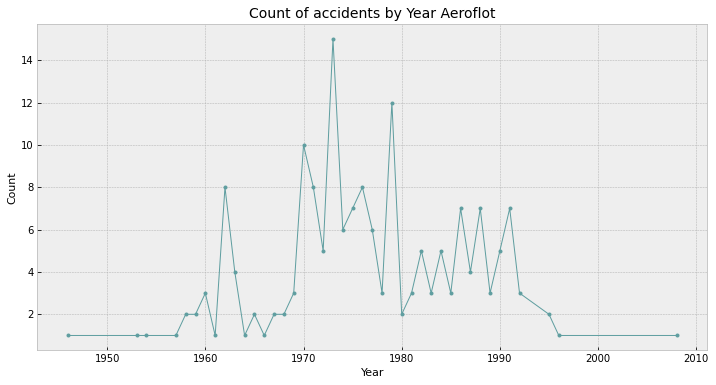

In [262]:
aeroflot = data[data.Operator == 'AEROFLOT']

count_by_year = aeroflot.groupby(data.Time.dt.year)[['Date']].count()
count_by_year = count_by_year.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.plot(count_by_year.index, 'Count', data=count_by_year, marker='.', color='cadetblue', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Count of accidents by Year Aeroflot', loc='Center', fontsize=14)
plt.show()


Да разгледаме неколку параметри коишто може да се причина што Aeroflot е авиокомпанија со најмногу авионски несреќи.

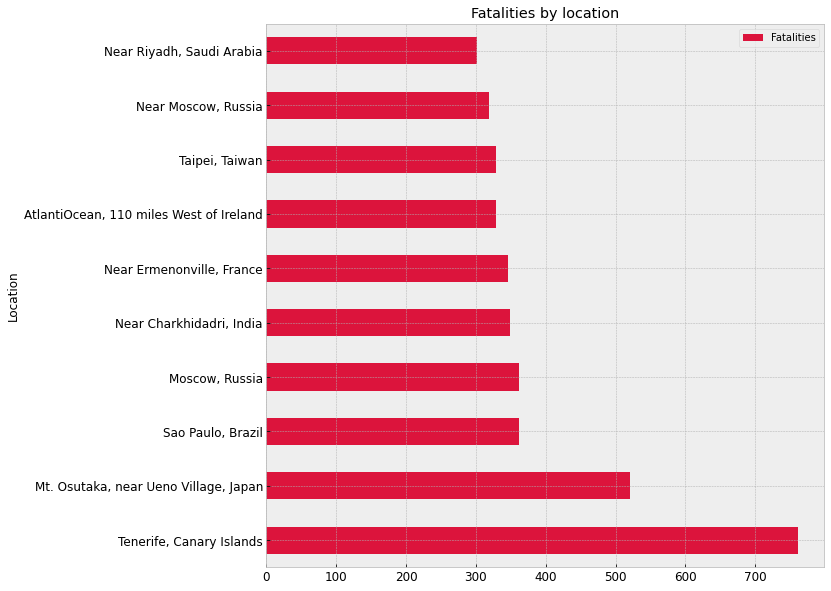

In [263]:
#број на загинати по локација на несреќата
data.groupby(['Location']).agg({'Fatalities':'sum'}).sort_values(by=['Fatalities'],ascending=False).head(10).plot(kind='barh', title='Fatalities by location', figsize=(10,10), fontsize=12,color='crimson')

Тоа што може да го заклучиме е дека првите две места по број на најмногу загинати се на локации коишто се острови.

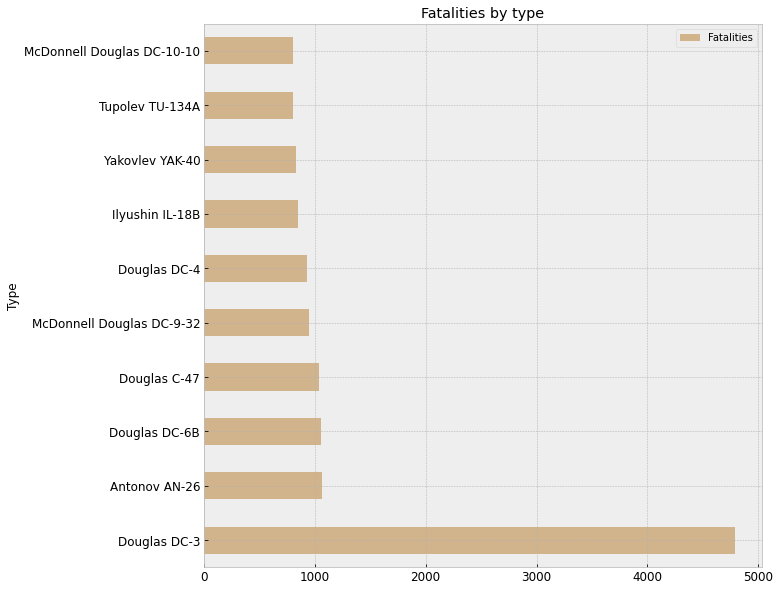

In [264]:
#број на загинати по тип на авион
data.groupby(['Type']).agg({'Fatalities':'sum'}).sort_values(by=['Fatalities'],ascending=False).head(10).plot(kind='barh', title='Fatalities by type', figsize=(10,10), fontsize=12,color='tan')

Според ова гледаме дека авионот Douglas DC-3 има над четирипат поголема веројатност да се сруши, но да видиме дали компанијата Aeroflot лета со овој тип на авиони.

In [265]:
filt=data['Type']=='Douglas DC-3'
doug=data.loc[filt,['Operator','Fatalities']].sort_values('Fatalities', ascending=False)
doug.head(10)

,Operator,Fatalities
1150,SOCIETE ALPES PROVENCE,39.0
2001,AIR VIETNAM (SOUTH VIETNAM),38.0
2197,ROYAL AIR LAO,37.0
2210,LADECO,36.0
1450,EMPRESA AVIACION DEL PACIFICO,36.0
2323,ROYAL NEPAL AIRLINES,35.0
2294,MINERAL COUNTY AIRLINES,35.0
3244,FLORIDA COMMUTER AIRLINES,34.0
1849,UNITED ARAB AIRLINES,34.0
1268,AIGLE AZUR,34.0


Aeroflot не се наоѓа во оваа листа, што значи дека типот на авион нема удел во тоа Aeroflot да е најлоша авиокомпанија.